In this notebook we explore how neural networks can approximate (i.e. mimick) any function.

The first step is to set up the random seed so the results are consistent across the runs



In [ ]:
#setup random seed for reproducibility
import tensorflow
tensorflow.keras.utils.set_random_seed(2)
tensorflow.config.experimental.enable_op_determinism()

Let's define the function to be approximated. We'll go for something simple: a parabola!

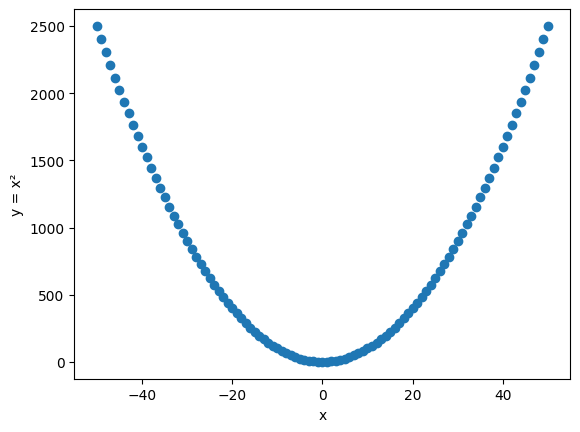

In [2]:
import numpy as np

# define x
x = np.array([i for i in range(-50,51)])

# our function: y = x²
y = x * x

# let's plot and see what we have
from matplotlib import pyplot
pyplot.scatter(x,y)
pyplot.xlabel('x')
pyplot.ylabel('y = x²')
pyplot.show()

We are now defining a simple network that will learn/approximate/mimick the relationship between x and y.

In [3]:
#define the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

#compile the model
model.compile(loss='mse', optimizer='adam')

#train the model
h = model.fit(x, y, epochs=500, batch_size=10, verbose=0)

We define a utility function to examine the training progress

In [4]:
import matplotlib.pyplot as plt
def plot_history(h, title, target='loss'):
	"""
	Given a history dictionary as returned by model.fit(), plots the required
	variable with the specified title. If present, validation is also
	plotted.

	Parameter:
	h (dict) : history object returned by keras model.fit()
	title : title for the plot
	target : name of the variable to be plotted

	Returns: nothing
	"""
	plt.rcParams["figure.figsize"]=5,5
	plt.plot(h.history[target], label = "Train " + target)
	#validation
	val_label = 'val_'+ target
	if val_label in h.history:
		plt.plot(h.history['val_'+target], label = "Validation " + target)
	plt.xlabel('Epochs')
	plt.title(title)
	plt.legend()
	plt.show()

Let's take a look to our training trajectory

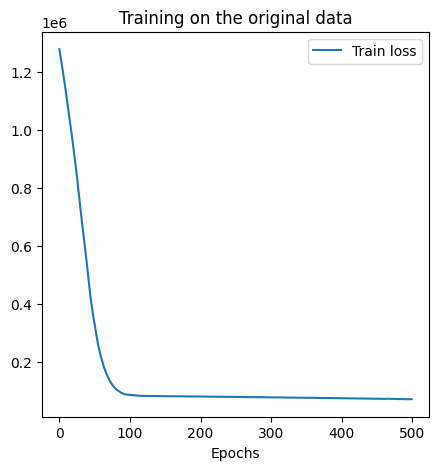

In [5]:
plot_history(h, title = 'Training on the original data')

We now feed again the x values to the model to retrieve its predictions (usually marked as ŷ, read "y hat"):

4/4 [==============================] - 0s 3ms/step


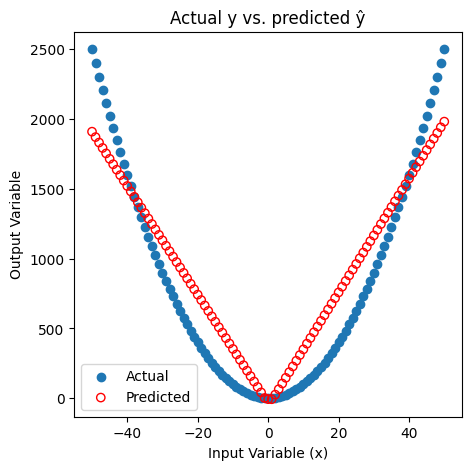

In [6]:
#use the trained model to predict the ŷ corresponding to the input x
yhat = model.predict(x)

#a plot comparing ŷ to actual y
pyplot.scatter(x,y, label='Actual')
pyplot.scatter(x,yhat, label='Predicted', edgecolors='red', facecolors='none', marker='o')
pyplot.title('Actual y vs. predicted ŷ')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable')
pyplot.legend()
pyplot.show()

This seems less than optimal, but it's mainly due to our model not liking the scale of the values (both x and y). We now redo the full procedure, but scale x and y in between zero and one

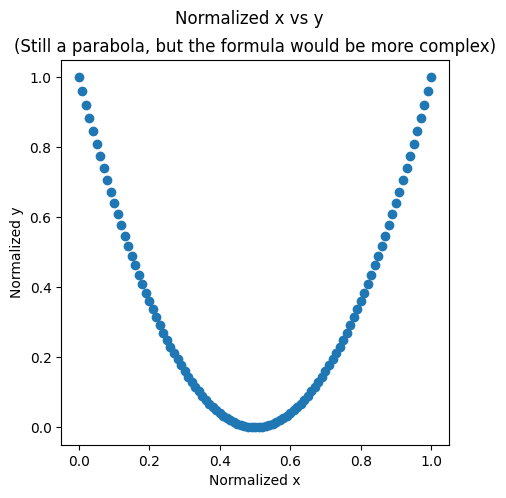

In [7]:
#normalize between zero and one both x and y
x_normalized = (x - x.min()) / ((x.max() - x.min()))
y_normalized = (y - y.min()) / ((y.max() - y.min()))

# let's plot the normalized output
from matplotlib import pyplot
pyplot.scatter(x_normalized,y_normalized)
pyplot.suptitle('Normalized x vs y')
pyplot.title('(Still a parabola, but the formula would be more complex)')
pyplot.xlabel('Normalized x')
pyplot.ylabel('Normalized y')
pyplot.show()

In [8]:
#declare a new, pristine model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

#compile the model
model.compile(loss='mse', optimizer='adam')

#train on the normalized values
h = model.fit(x_normalized, y_normalized, epochs=500, batch_size=10, verbose=0)

taking a look at our training trajectory

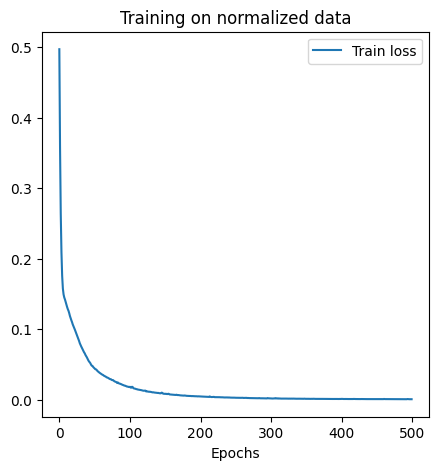

In [9]:
plot_history(h, title = 'Training on normalized data')

Comparing true and predicted values

4/4 [==============================] - 0s 3ms/step


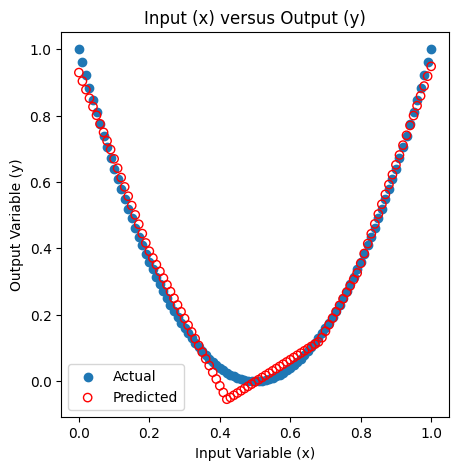

In [10]:
y_normalized_hat = model.predict(x_normalized)
pyplot.scatter(x_normalized,y_normalized, label='Actual')
pyplot.scatter(x_normalized,y_normalized_hat, label='Predicted', edgecolors='red', facecolors='none', marker='o')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

Same thing, with a third grade polynomial

4/4 [==============================] - 0s 4ms/step


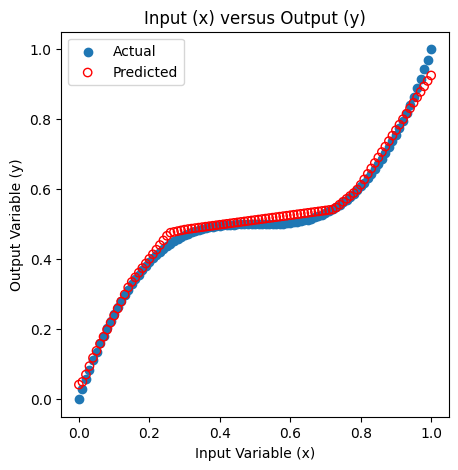

In [11]:
# define x and y = x³ - x
x = np.array([i for i in range(-50,51)])
y = x * x * x - x

#normalize
x_normalized = (x - x.min()) / ((x.max() - x.min()))
y_normalized = (y - y.min()) / ((y.max() - y.min()))

#define the network
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

#compile the model
model.compile(loss='mse', optimizer='adam')

#train on the normalized values
h = model.fit(x_normalized, y_normalized, epochs=500, batch_size=10, verbose=0)

#repredict the input
y_normalized_hat = model.predict(x_normalized)

#plot the results
pyplot.scatter(x_normalized,y_normalized, label='Actual')
pyplot.scatter(x_normalized,y_normalized_hat, label='Predicted', edgecolors='red', facecolors='none', marker='o')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()